In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [306]:
data = pd.read_csv(r"C:\Users\kanha\Desktop\MLops\FAST_API_for_Machine_Learning\ML_fastapi\insurance.csv")

In [307]:
data.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


## Univariate analysis

In [308]:
for col in data.select_dtypes(exclude=["int64", "float64"]):
    print(f"\nValue counts for column: {col}")
    print ("____________________________")
    print (data[col].value_counts())


Value counts for column: smoker
____________________________
smoker
False    57
True     43
Name: count, dtype: int64

Value counts for column: city
____________________________
city
Jaipur        9
Indore        9
Chandigarh    9
Lucknow       9
Jalandhar     9
Delhi         8
Chennai       7
Mumbai        7
Kota          6
Hyderabad     6
Mysore        6
Kolkata       5
Pune          4
Bangalore     4
Gaya          2
Name: count, dtype: int64

Value counts for column: occupation
____________________________
occupation
retired           26
unemployed        15
government_job    14
student           12
freelancer        11
business_owner    11
private_job       11
Name: count, dtype: int64

Value counts for column: insurance_premium_category
____________________________
insurance_premium_category
Low       34
High      33
Medium    33
Name: count, dtype: int64


In [309]:
for col in data.select_dtypes(include=["int64", "float64"]):
    print(f"\nDistribution for : {col}")
    print ("____________________________")
    print (pd.cut(data[col], bins = 10).value_counts().sort_index())


Distribution for : age
____________________________
age
(17.943, 23.7]     9
(23.7, 29.4]       9
(29.4, 35.1]      11
(35.1, 40.8]      11
(40.8, 46.5]       9
(46.5, 52.2]      10
(52.2, 57.9]       7
(57.9, 63.6]      14
(63.6, 69.3]       9
(69.3, 75.0]      11
Name: count, dtype: int64

Distribution for : weight
____________________________
weight
(51.031, 57.97]     13
(57.97, 64.84]      13
(64.84, 71.71]      10
(71.71, 78.58]       8
(78.58, 85.45]      10
(85.45, 92.32]       5
(92.32, 99.19]       9
(99.19, 106.06]     13
(106.06, 112.93]     8
(112.93, 119.8]     11
Name: count, dtype: int64

Distribution for : height
____________________________
height
(1.5, 1.54]      5
(1.54, 1.58]    11
(1.58, 1.62]    11
(1.62, 1.66]    11
(1.66, 1.7]      9
(1.7, 1.74]      7
(1.74, 1.78]    13
(1.78, 1.82]     9
(1.82, 1.86]    17
(1.86, 1.9]      7
Name: count, dtype: int64

Distribution for : income_lpa
____________________________
income_lpa
(0.481, 5.477]      38
(5.477, 10.424]


Distribution for: age
____________________________


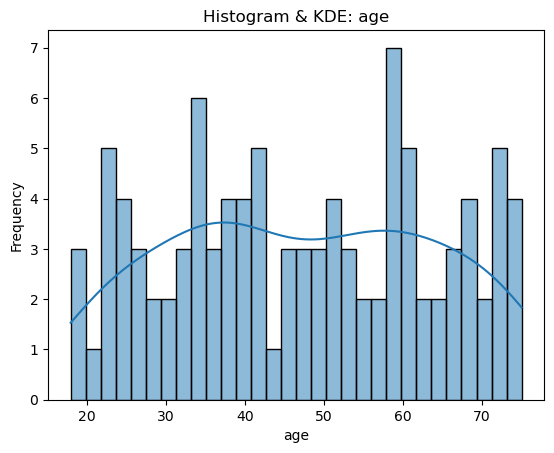


Distribution for: weight
____________________________


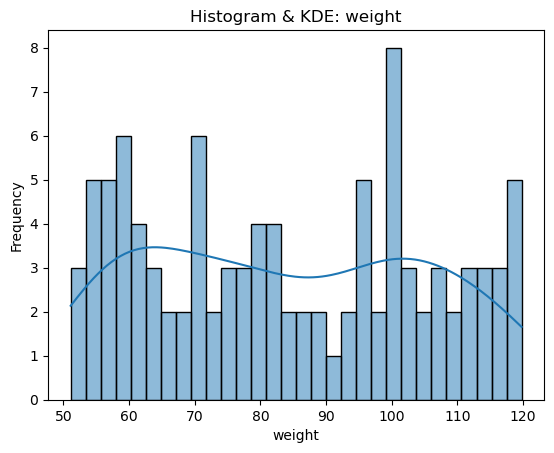


Distribution for: height
____________________________


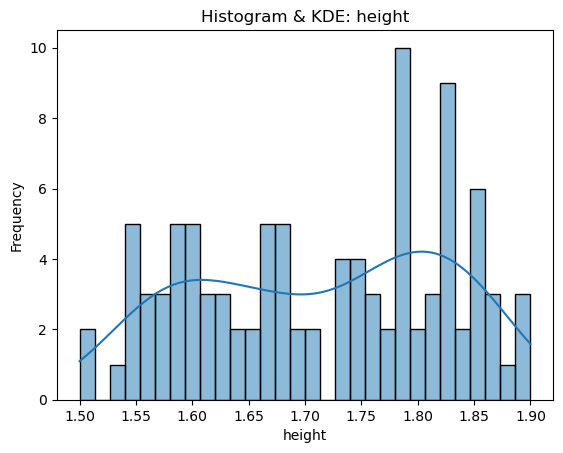


Distribution for: income_lpa
____________________________


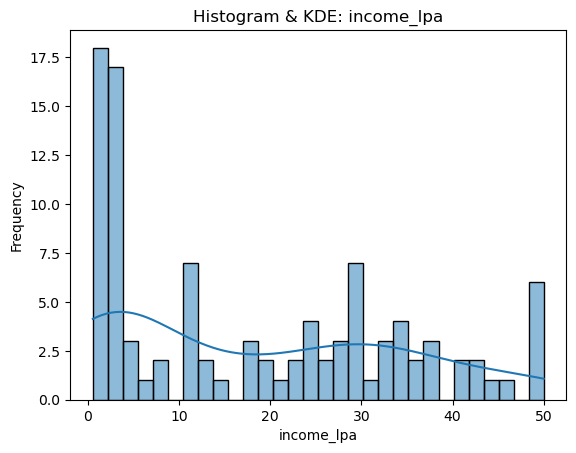

In [310]:
# Plot histogram and KDE for each numeric column
for col in data.select_dtypes(include=["int64", "float64"]).columns:
    print(f"\nDistribution for: {col}")
    print("____________________________")
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Histogram & KDE: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Data processing

In [311]:
data_feat = data.copy()

In [312]:
data_feat.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


In [313]:
data_feat["BMI"] =round( data_feat["weight"]/(data_feat['height']**2),2)

In [314]:
data_feat.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,BMI
0,67,119.8,1.56,2.92,False,Jaipur,retired,High,49.23
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low,30.19
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low,21.12
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium,45.54
4,69,62.2,1.60,3.94,True,Indore,retired,High,24.30


In [315]:
tier_1_cities = ["Mumbai", "Delhi", "Bangalore", "Chennai", "Kolkata", "Hyderabad", "Pune"]
tier_2_cities = [
    "Jaipur", "Chandigarh", "Indore", "Lucknow", "Patna", "Ranchi", "Visakhapatnam", "Coimbatore",
    "Bhopal", "Nagpur", "Vadodara", "Surat", "Rajkot", "Jodhpur", "Raipur", "Amritsar", "Varanasi",
    "Agra", "Dehradun", "Mysore", "Jabalpur", "Guwahati", "Thiruvananthapuram", "Ludhiana", "Nashik",
    "Allahabad", "Udaipur", "Aurangabad", "Hubli", "Belgaum", "Salem", "Vijayawada", "Tiruchirappalli",
    "Bhavnagar", "Gwalior", "Dhanbad", "Bareilly", "Aligarh", "Gaya", "Kozhikode", "Warangal",
    "Kolhapur", "Bilaspur", "Jalandhar", "Noida", "Guntur", "Asansol", "Siliguri"
]

def city_tier(city):
    if city in tier_1_cities:
        return 1
    elif city in tier_2_cities:
        return 2
    else:
        return 3

In [316]:
data_feat["city_tier"] = data_feat["city"].apply(city_tier)

In [317]:
data_feat.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,BMI,city_tier
0,67,119.8,1.56,2.92,False,Jaipur,retired,High,49.23,2
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low,30.19,1
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low,21.12,2
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium,45.54,1
4,69,62.2,1.60,3.94,True,Indore,retired,High,24.30,2


In [318]:
def age_group(age):
    if age < 25:
        return "young"
    elif age < 45:
        return "adult"
    elif age < 60:
        return "middle_aged"
    return "senior"

In [319]:
data_feat["age_group"] =data_feat["age"].apply(age_group)

In [320]:
data_feat.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,BMI,city_tier,age_group
0,67,119.8,1.56,2.92,False,Jaipur,retired,High,49.23,2,senior
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low,30.19,1,adult
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low,21.12,2,adult
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium,45.54,1,young
4,69,62.2,1.60,3.94,True,Indore,retired,High,24.30,2,senior


In [321]:
## lifestyle risk

def lifestyle_risk(row):
    if row['BMI'] > 30 and row['smoker'] == True:
        return "high"
    if row['BMI'] > 27 and row['smoker'] == True:
        return "Medium"
    else:
        return "low"

In [322]:
data_feat['lifestyle_risk'] = data_feat.apply(lifestyle_risk, axis =1)

In [323]:
data_feat['lifestyle_risk'].value_counts()

lifestyle_risk
low       73
high      20
Medium     7
Name: count, dtype: int64

In [324]:
data_feat.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,BMI,city_tier,age_group,lifestyle_risk
0,67,119.8,1.56,2.92,False,Jaipur,retired,High,49.23,2,senior,low
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low,30.19,1,adult,low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low,21.12,2,adult,low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium,45.54,1,young,high
4,69,62.2,1.60,3.94,True,Indore,retired,High,24.30,2,senior,low


In [325]:
data['city'].nunique()

15

In [326]:
data_feat.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,BMI,city_tier,age_group,lifestyle_risk
0,67,119.8,1.56,2.92,False,Jaipur,retired,High,49.23,2,senior,low
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low,30.19,1,adult,low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low,21.12,2,adult,low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium,45.54,1,young,high
4,69,62.2,1.60,3.94,True,Indore,retired,High,24.30,2,senior,low


In [327]:
data_feat.drop(columns=['age', 'weight', 'height', 'smoker', 'city'])[['income_lpa', 'occupation', 'BMI', 'age_group', 'lifestyle_risk', 'city_tier', 'insurance_premium_category']].sample(5)


,income_lpa,occupation,BMI,age_group,lifestyle_risk,city_tier,insurance_premium_category
62,35.67,business_owner,21.74,adult,low,1,Low
30,32.97,business_owner,29.94,adult,low,1,Low
15,2.99,retired,21.86,senior,low,1,Medium
68,0.68,student,22.96,young,low,2,Low
42,2.60,student,21.82,young,low,2,Medium


In [328]:

# Select features and target
X = data_feat[["BMI", "age_group", "lifestyle_risk", "city_tier", "income_lpa", "occupation"]]
y = data_feat["insurance_premium_category"]

In [329]:
# Define categorical and numeric features
categorical_features = ["age_group", "lifestyle_risk", "occupation", "city_tier"]
numeric_features = ["BMI", "income_lpa"]

In [330]:

# Create column transformer for OHE
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)
     

In [331]:

# Create a pipeline with preprocessing and random forest classifier
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, n_estimators=50))
])

In [332]:
# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age_group',
                                                   'lifestyle_risk',
                                                   'occupation', 'city_tier']),
                                                 ('num', 'passthrough',
                                                  ['BMI', 'income_lpa'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [333]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [334]:
import pickle

# Save the trained pipeline using pickle
pickle_model_path = "model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(pipeline, f)

In [335]:
y_pred

array(['High', 'High', 'Medium', 'High', 'Low', 'Medium', 'Medium', 'Low',
       'Low', 'High', 'Low', 'Medium', 'Medium', 'Low', 'High', 'Medium',
       'Medium', 'High', 'High', 'Low'], dtype=object)

In [336]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Users\kanha\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, sentence-transformers
Note: you may need to restart the kernel to use updated packages.
